In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xlrd

In [29]:
df = pd.read_excel('ActOp.xlsx')
# df.set_index('Data inicial', inplace=True)
df


,Data inicial,Hora inicial,Data final,Hora final,Total hores,Espai,Estudi,Activitat,Alumnes matriculats,Modalitat docencia,Observacions
0,01/02/2023,08:00,01/02/2023,17:00,9,QC/0011,NaN,600-12 instal·lació videowall,0,,
1,01/02/2023,09:00,01/02/2023,12:00,3,Q3/1007,NaN,958-03 102773 Fonaments de la tecnologia de la...,0,,
2,01/02/2023,09:00,01/02/2023,12:00,3,Q3/1003,NaN,958-03 102773 Fonaments de tecnologia de la in...,0,,
3,01/02/2023,09:00,01/02/2023,15:00,6,Q4/0011,NaN,951-03 102401 Ampliació d'operacions de separació,0,,
4,01/02/2023,10:30,01/02/2023,13:00,2.5,Q4/1005,NaN,1497-20 Revisió d'exàmens,0,,
...,...,...,...,...,...,...,...,...,...,...,...
2976,28/02/2023,18:00,28/02/2023,20:00,2,Q3/0003,10088 Enginyeria Informàtica i Enginyeria de S...,102685 Arquitectura de Computadors i Perifèric...,93,,
2977,,,,,,Q3/0003,10063 Enginyeria Electrònica de Telecomunicació,102685 Arquitectura de Computadors i Perifèric...,93,,
2978,,,,,,Q3/0003,10089 Enginyeria Informàtica i Enginyeria Elec...,102685 Arquitectura de Computadors i Perifèric...,93,,
2979,,,,,,Q3/0003,10100 Enginyeria Electrònica de Telecomunicaci...,102685 Arquitectura de Computadors i Perifèric...,93,,


In [30]:
# Drop unnecessary columns

original_df = df.copy()
del df['Data final'], df['Hora final'], df['Modalitat docencia'], df['Observacions']

In [31]:
# Drop redundant rows

for i, r in df.iterrows():
    if r['Data inicial'] == ' ':
        df.drop(i, inplace=True)

df


,Data inicial,Hora inicial,Total hores,Espai,Estudi,Activitat,Alumnes matriculats
0,01/02/2023,08:00,9,QC/0011,NaN,600-12 instal·lació videowall,0
1,01/02/2023,09:00,3,Q3/1007,NaN,958-03 102773 Fonaments de la tecnologia de la...,0
2,01/02/2023,09:00,3,Q3/1003,NaN,958-03 102773 Fonaments de tecnologia de la in...,0
3,01/02/2023,09:00,6,Q4/0011,NaN,951-03 102401 Ampliació d'operacions de separació,0
4,01/02/2023,10:30,2.5,Q4/1005,NaN,1497-20 Revisió d'exàmens,0
...,...,...,...,...,...,...,...
2968,28/02/2023,18:00,1,Q4/1009,10062 Enginyeria Informàtica,102768 Intel·ligència Artificial - 451,Sense grup de matricula
2971,28/02/2023,18:00,1,Q4/1003,10130 Intel·ligència Artificial / Artificial I...,106573 Xarxes Neuronals i Aprenentatge Profund...,Sense grup de matricula
2972,28/02/2023,18:00,1,Q3/0009,10088 Enginyeria Informàtica i Enginyeria de S...,102769 Informació i Seguretat - 453,Sense grup de matricula
2975,28/02/2023,18:00,2,Q2/1009,10105 Gestió de Ciutats Intel·ligents i Sosten...,104539 Seguretat i Privacitat Dels Sistemes d'...,52


In [32]:
# Check for missing info

print(f"We know occupation of {len(list(df[df['Alumnes matriculats'].apply(lambda x: isinstance(x, int)) & df['Alumnes matriculats'] > 0]['Espai'])) / len(list(df['Espai'])) * 100}% activities.") 

We know occupation of 41.96625091709464% activities.


In [33]:
# Create a dictionary of studies and their activities. Esta malament el codi!

assignatures = {}

for i, r in df.iterrows():
    e = r['Estudi']
    if not pd.isna(e):
        if e not in assignatures.keys():
            assignatures[e] = []
            if (not pd.isna(r['Activitat'])) and (r['Activitat'] not in assignatures[e]):
                assignatures[e].append(r['Activitat'])

print(assignatures) # It's too incomplete

{'6084 Enginyeria de Telecomunicació / Telecommunication Engineering': ['102689 Components i Circuits Electrònics - 311'], '10109 Enginyeria de Dades': ['104361 Aprenentatge Computacional - 811'], '10089 Enginyeria Informàtica i Enginyeria Electrònica de Telecomunicació': ['102747 Sistemes Operatius - 431'], '10065 Enginyeria Química': ['106050 Bases de l\x92Enginyeria Química - 212'], '10062 Enginyeria Informàtica': ["103804 Ètica per a l'Enginyeria - 410"], '10100 Enginyeria Electrònica de Telecomunicació + Enginyeria de Sistemes de Telecomunicació': ['103795 Àlgebra - 33'], '10105 Gestió de Ciutats Intel·ligents i Sostenibles': ['104526 Demografia, Societat i Economia Urbana - 61'], '10088 Enginyeria Informàtica i Enginyeria de Sistemes de Telecomunicació': ['102690 Fonaments de Senyals i Sistemes - 31'], '10064 Enginyeria de Sistemes de Telecomunicació': ['102707 Física Bàsica - 33'], '10063 Enginyeria Electrònica de Telecomunicació': ['102690 Fonaments de Senyals i Sistemes - 311'

In [34]:
ocus = []

for element in df['Alumnes matriculats']:
    if isinstance(element, int):
        ocus.append(element)

print(len(ocus), len(df['Alumnes matriculats']))

print(max(ocus), min(ocus), np.mean(ocus))

818 1363
151 0 40.13080684596577


In [35]:
for i, r in df.iterrows():
    if (not isinstance(r['Alumnes matriculats'], int)):
        r['Alumnes matriculats'] = 40 # Approximate mean and also median

In [21]:
for i, r in df.iterrows():
    if (not isinstance(r['Alumnes matriculats'], int)) or (r['Alumnes matriculats'] == 0):
        r['Alumnes matriculats'] = 40 # Approximate mean and also median

In [36]:
df.head(40)

,Data inicial,Hora inicial,Total hores,Espai,Estudi,Activitat,Alumnes matriculats
0,01/02/2023,08:00,9,QC/0011,NaN,600-12 instal·lació videowall,0
1,01/02/2023,09:00,3,Q3/1007,NaN,958-03 102773 Fonaments de la tecnologia de la...,0
2,01/02/2023,09:00,3,Q3/1003,NaN,958-03 102773 Fonaments de tecnologia de la in...,0
3,01/02/2023,09:00,6,Q4/0011,NaN,951-03 102401 Ampliació d'operacions de separació,0
4,01/02/2023,10:30,2.5,Q4/1005,NaN,1497-20 Revisió d'exàmens,0
5,01/02/2023,11:00,2,QC/0029,NaN,470-01 Consell de Departament Jordi Carrabina,0
6,01/02/2023,11:30,2,QC/3115.1,NaN,2634-01 Reunió grup de recerca Xavier Font,0
7,01/02/2023,12:00,3,Q1/1003,NaN,1365-03 103799 Fonaments d'informàtica,0
8,01/02/2023,12:00,3,Q3/1007,NaN,958-03 102774 Estructura de computadors,0
9,01/02/2023,12:00,3,Q1/1011,NaN,1365-03 103799 Fonaments d'informàtica,0


In [37]:
dates = []
for d in df['Data inicial']:
    if d not in dates:
        dates.append(d)
dates = {key: 0 for key in dates}

for i, r in df.iterrows():
    dates[r['Data inicial']] += (r['Total hores'] * r['Alumnes matriculats'])

dates

{'01/02/2023': 0.0,
 '02/02/2023': 0.0,
 '03/02/2023': 148.0,
 '04/02/2023': 0,
 '06/02/2023': 40.0,
 '07/02/2023': 0.0,
 '08/02/2023': 0.0,
 '09/02/2023': 0.0,
 '10/02/2023': 148.0,
 '13/02/2023': 6148,
 '14/02/2023': 7302.0,
 '15/02/2023': 7709,
 '16/02/2023': 6580.0,
 '17/02/2023': 6040.0,
 '20/02/2023': 6148.0,
 '21/02/2023': 7382,
 '22/02/2023': 7709,
 '23/02/2023': 6420.0,
 '24/02/2023': 6080.0,
 '27/02/2023': 6308.0,
 '28/02/2023': 7702}

In [38]:
new_df = pd.DataFrame()
new_df['Data'] = dates.keys()
new_df.set_index('Data', inplace=True)

valors = list(dates.values())

# new_df['total_oc_x_h'] = valors.T[0]
new_df['total_oc_x_h'] = valors


new_df

,total_oc_x_h
Data,
01/02/2023,0.0
02/02/2023,0.0
03/02/2023,148.0
04/02/2023,0.0
06/02/2023,40.0
07/02/2023,0.0
08/02/2023,0.0
09/02/2023,0.0
10/02/2023,148.0


In [39]:
aules = []
for q in df['Espai']:
    if q not in aules:
        aules.append(q)

for q in aules:
    new_df[q + '_oc_x_h'] = 0

new_df

,total_oc_x_h,QC/0011_oc_x_h,Q3/1007_oc_x_h,Q3/1003_oc_x_h,Q4/0011_oc_x_h,Q4/1005_oc_x_h,QC/0029_oc_x_h,QC/3115.1_oc_x_h,Q1/1003_oc_x_h,Q1/1011_oc_x_h,...,Q3/0009_oc_x_h,Q2/0007_oc_x_h,Q2/1009_oc_x_h,Q2/1005_oc_x_h,Q4/1009_oc_x_h,Q2/0019_oc_x_h,Q5/2006_oc_x_h,Q2/0013_oc_x_h,Q6/2007_oc_x_h,Q2/0011_oc_x_h
Data,,,,,,,,,,,,,,,,,,,,,
01/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03/02/2023,148.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
04/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06/02/2023,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
08/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10/02/2023,148.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# hores * ocupacio  

for i, r in df.iterrows():
    new_df.loc[r['Data inicial'], r['Espai']+'_oc_x_h'] += r['Total hores'] * r['Alumnes matriculats']

new_df

    

,total_oc_x_h,QC/0011_oc_x_h,Q3/1007_oc_x_h,Q3/1003_oc_x_h,Q4/0011_oc_x_h,Q4/1005_oc_x_h,QC/0029_oc_x_h,QC/3115.1_oc_x_h,Q1/1003_oc_x_h,Q1/1011_oc_x_h,...,Q3/0009_oc_x_h,Q2/0007_oc_x_h,Q2/1009_oc_x_h,Q2/1005_oc_x_h,Q4/1009_oc_x_h,Q2/0019_oc_x_h,Q5/2006_oc_x_h,Q2/0013_oc_x_h,Q6/2007_oc_x_h,Q2/0011_oc_x_h
Data,,,,,,,,,,,,,,,,,,,,,
01/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
03/02/2023,148.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
04/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06/02/2023,40.0,0,0,0,0,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,0
07/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
08/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09/02/2023,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10/02/2023,148.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


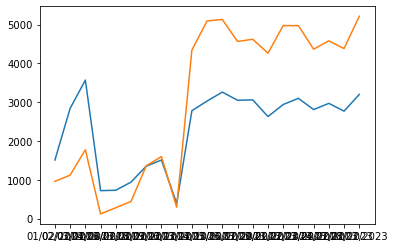

In [27]:
plt.plot(new_df.index.values, new_df['total_hours']*20)
plt.plot(new_df.index.values, new_df['total_occ'])
plt.show()

In [ ]:
def data_by_day(excel_name):
    df = pd.read_excel('ActOp.xlsx')
    # Delete unnecessary data
    del df['Data final'], df['Hora final'], df['Modalitat docencia'], df['Observacions']

    # Drop redundant rows
    for i, r in df.iterrows():
        if r['Data inicial'] == ' ':
            df.drop(i, inplace=True)
    
    # Fill missing occupation data
    ocus = []
    for element in df['Alumnes matriculats']:
        if isinstance(element, int):
            ocus.append(element)
    mean_matricula = int(np.mean(ocus))
    for i, r in df.iterrows():
        if (not isinstance(r['Alumnes matriculats'], int)):
            r['Alumnes matriculats'] = mean_matricula # Approximate mean and also median
        
    # Generate new DataFrame and add Total (alumni * h) data
    dates = []
    for d in df['Data inicial']:
        if d not in dates:
            dates.append(d)
    dates = {key: 0 for key in dates}
    for i, r in df.iterrows():
        dates[r['Data inicial']] += (r['Total hores'] * r['Alumnes matriculats'])
    new_df = pd.DataFrame()
    new_df['Data'] = dates.keys()
    new_df.set_index('Data', inplace=True)
    valors = list(dates.values())
    new_df['total_oc_x_h'] = valors

    # Add by-classroom data
    aules = []
    for q in df['Espai']:
        if q not in aules:
            aules.append(q)
    for q in aules:
        new_df[q + '_oc_x_h'] = 0
    for i, r in df.iterrows():
        new_df.loc[r['Data inicial'], r['Espai']+'_oc_x_h'] += r['Total hores'] * r['Alumnes matriculats']
    
    return new_df